# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 581
['khandyga', 'amga', 'saldanha', 'grytviken', 'punta arenas', 'hawaiian paradise park', 'boyolangu', 'puerto natales', 'yellowknife', 'iqaluit', 'port-aux-francais', 'salahonda', 'edinburgh of the seven seas', 'whitehorse', 'malpica', 'adamstown', 'isafjordur', 'sisimiut', 'olonkinbyen', 'badger', 'sao gabriel da cachoeira', 'xilin hot', 'uturoa', 'waitangi', 'west island', 'takamaka', 'hermanus', 'bredasdorp', 'ilulissat', "qacha's nek", 'trashi yangtse', 'petropavlovsk-kamchatsky', 'bilibino', 'tura', 'stepnoye', 'khash', 'suntar', 'contamana', 'montecristi', 'kuching', 'margaret river', 'port mathurin', 'ushuaia', 'quchan', 'port alfred', 'blackmans bay', "'ohonua", 'jamestown', 'porto novo', 'hotan', 'tolanaro', 'papatowai', 'anadyr', 'revda', 'al bardiyah', 'kuraymah', 'volchikha', 'aykhal', 'albany', 'clarksville', 'deschutes river woods', 'lebu', 'ribeira grande', 'rio grande', 'kourou', 'kingston', 'markovo', 'stanley', 'tiksi', 'georgetown', '

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:

        each_city = requests.get(city_url)
       
        # Parse the JSON and retrieve data
        city_weather = each_city.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(city_data)


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khandyga
Processing Record 2 of Set 1 | amga
Processing Record 3 of Set 1 | saldanha
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | hawaiian paradise park
Processing Record 7 of Set 1 | boyolangu
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | salahonda
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | malpica
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | isafjordur
Processing Record 18 of Set 1 | sisimiut
Processing Record 19 of Set 1 | olonkinbyen
Processing Record 20 of Set 1 | badger
Processing Record 21 of Set 1 | sao gabriel da cachoeira
Processing Rec

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khandyga,62.6667,135.6000,3.52,90,99,0.89,RU,1685039817
1,amga,60.8953,131.9608,2.36,88,43,0.72,RU,1685039817
2,saldanha,-33.0117,17.9442,12.03,66,7,6.70,ZA,1685039818
3,grytviken,-54.2811,-36.5092,0.23,91,95,1.97,GS,1685039605
4,punta arenas,-53.1500,-70.9167,5.06,65,75,4.63,CL,1685039818


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khandyga,62.6667,135.6000,3.52,90,99,0.89,RU,1685039817
1,amga,60.8953,131.9608,2.36,88,43,0.72,RU,1685039817
2,saldanha,-33.0117,17.9442,12.03,66,7,6.70,ZA,1685039818
3,grytviken,-54.2811,-36.5092,0.23,91,95,1.97,GS,1685039605
4,punta arenas,-53.1500,-70.9167,5.06,65,75,4.63,CL,1685039818


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

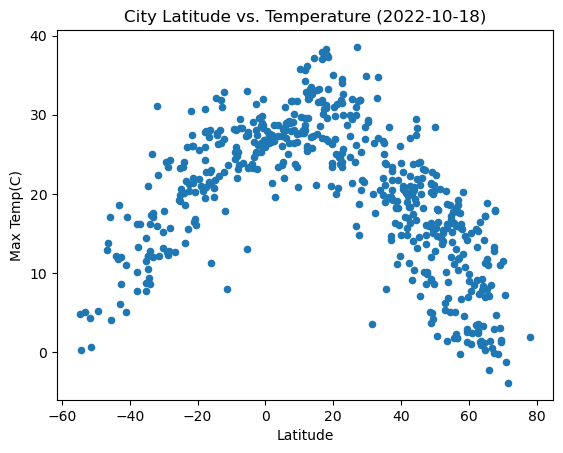

In [19]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", xlabel="Latitude", ylabel="Max Temp(C)", 
                  title="City Latitude vs. Temperature (2022-10-18)")


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

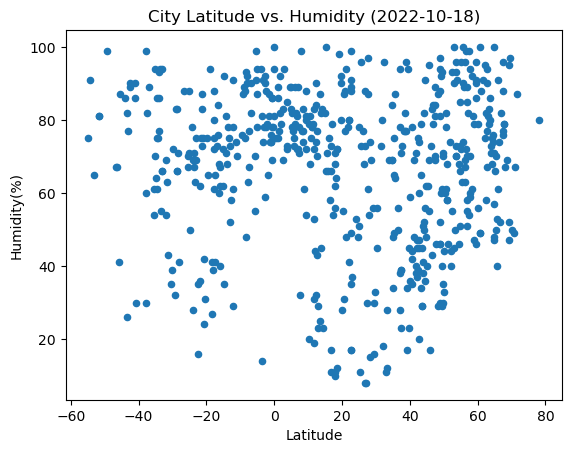

In [20]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", xlabel="Latitude", ylabel="Humidity(%)", 
                  title="City Latitude vs. Humidity (2022-10-18)")


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

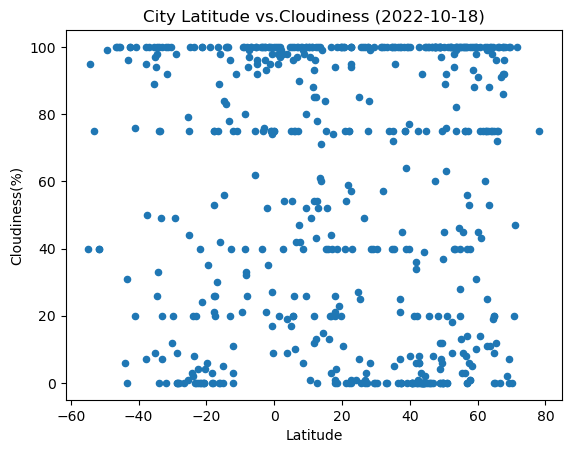

In [21]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", xlabel="Latitude", ylabel="Cloudiness(%)", 
                  title="City Latitude vs.Cloudiness (2022-10-18)")


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

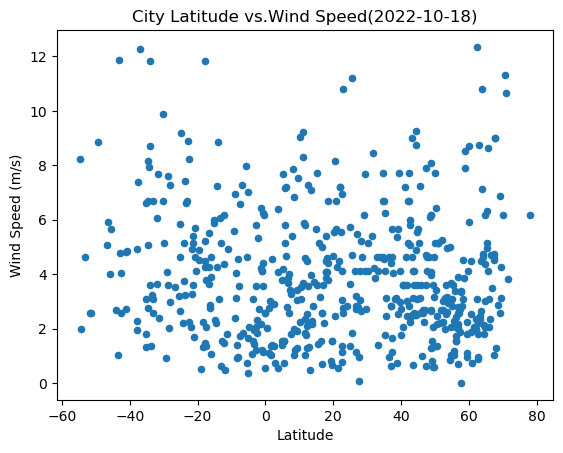

In [22]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", xlabel="Latitude", ylabel="Wind Speed (m/s)", 
                  title="City Latitude vs.Wind Speed(2022-10-18)")


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_df = city_data_df.loc[city_data_df["Lat"]>= 0 ]

# Display sample data
north_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khandyga,62.6667,135.6000,3.52,90,99,0.89,RU,1685039817
1,amga,60.8953,131.9608,2.36,88,43,0.72,RU,1685039817
5,hawaiian paradise park,19.5933,-154.9731,23.35,92,100,1.54,US,1685039819
8,yellowknife,62.4560,-114.3525,13.29,58,75,3.09,CA,1685039702
9,iqaluit,63.7506,-68.5145,0.85,80,100,4.47,CA,1685039820


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_df = city_data_df.loc[city_data_df["Lat"] < 0 ]

# Display sample data
south_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,saldanha,-33.0117,17.9442,12.03,66,7,6.70,ZA,1685039818
3,grytviken,-54.2811,-36.5092,0.23,91,95,1.97,GS,1685039605
4,punta arenas,-53.1500,-70.9167,5.06,65,75,4.63,CL,1685039818
6,boyolangu,-8.1181,111.8935,23.08,90,26,0.96,ID,1685039819
7,puerto natales,-51.7236,-72.4875,4.25,81,40,2.57,CL,1685039820


###  Temperature vs. Latitude Linear Regression Plot

The R-squared value is: 0.645223


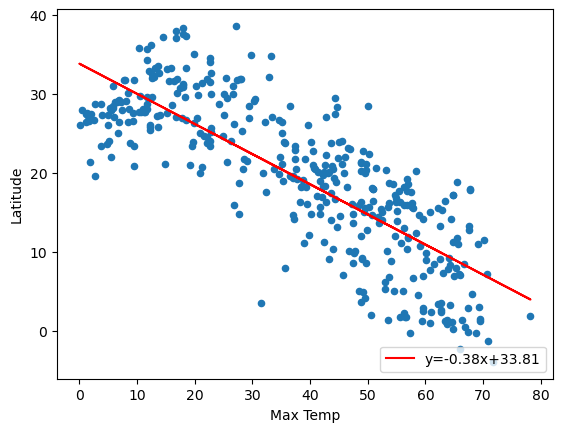

In [25]:
# Linear regression on Northern Hemisphere
x= north_df["Lat"]
y= north_df["Max Temp"]
north_temp = north_df.plot(kind="scatter", x="Lat", y="Max Temp", 
                           ylabel="Latitude", xlabel="Max Temp")
north_temp
res = stats.linregress(x, y)
print(f"The R-squared value is: {res.rvalue**2:.6f}")
m, b = np.polyfit(x, y, 1)
plt.plot(x, (m*x+b), color='red', label= "y={:.2f}x+{:.2f}".format(res.slope,res.intercept))
plt.legend(loc='lower right')

The R-squared value is: 0.630098


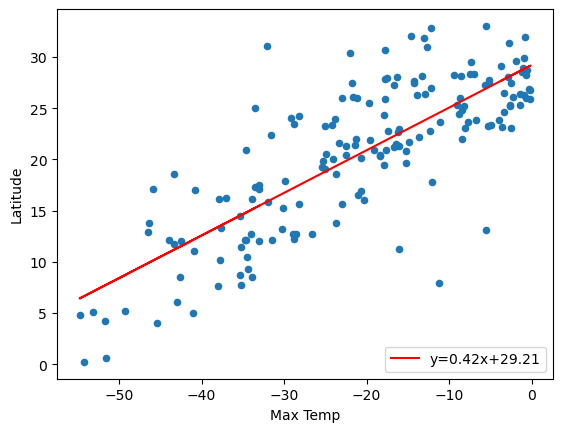

In [26]:
# Linear regression on Southern Hemisphere
x= south_df["Lat"]
y= south_df["Max Temp"]
south_temp = south_df.plot(kind="scatter", x="Lat", y="Max Temp", 
                           ylabel="Latitude", xlabel="Max Temp")

res = stats.linregress(x, y)
print(f"The R-squared value is: {res.rvalue**2:.6f}")
m, b = np.polyfit(x, y, 1)
plt.plot(x, (m*x+b), color='red', label= "y={:.2f}x+{:.2f}".format(res.slope,res.intercept))
plt.legend(loc='lower right')

**Discussion about the linear relationship:** 
The scatter plot shows that in the cities in northern hemisphere as the latitude increase temperature reduces, showing temperatures are higher near equator. In the southern hemisphere temperature increases with increase in latitude which also shows higher temperature near equator. The Rsquared values show that the correlation is somewhat strong.

### Humidity vs. Latitude Linear Regression Plot

The R-squared value is: 0.001293


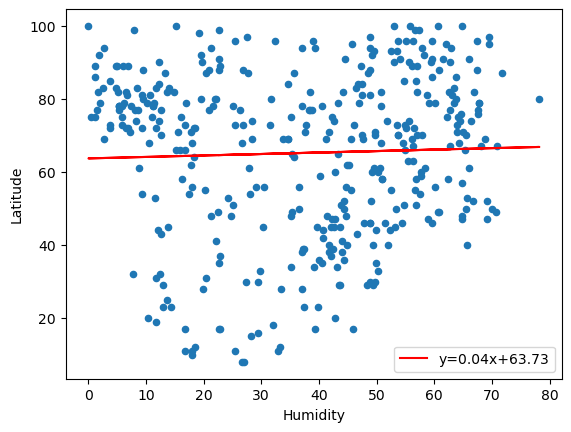

In [27]:
# Northern Hemisphere
x= north_df["Lat"]
y= north_df["Humidity"]
north_humidity = north_df.plot(kind="scatter", x="Lat", y="Humidity", 
                           ylabel="Latitude", xlabel="Humidity")

res = stats.linregress(x, y)
print(f"The R-squared value is: {res.rvalue**2:.6f}")
m, b = np.polyfit(x, y, 1)
plt.plot(x, (m*x+b), color='red', label= "y={:.2f}x+{:.2f}".format(res.slope,res.intercept))
plt.legend(loc='lower right')

The R-squared value is: 0.009782


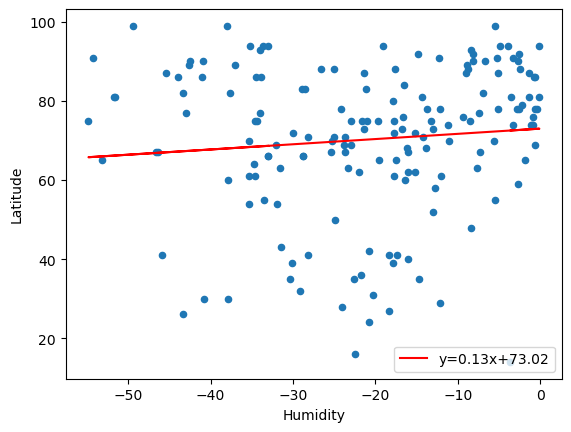

In [28]:
# Southern Hemisphere
x= south_df["Lat"]
y= south_df["Humidity"]
south_humidity = south_df.plot(kind="scatter", x="Lat", y="Humidity", 
                           ylabel="Latitude", xlabel="Humidity")

res = stats.linregress(x, y)
print(f"The R-squared value is: {res.rvalue**2:.6f}")
m, b = np.polyfit(x, y, 1)
plt.plot(x, (m*x+b), color='red', label= "y={:.2f}x+{:.2f}".format(res.slope,res.intercept))
plt.legend(loc='lower right')

**Discussion about the linear relationship:** Based on the scatter plot and regression value there is not enough correlation between humidity and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The R-squared value is: 0.002368


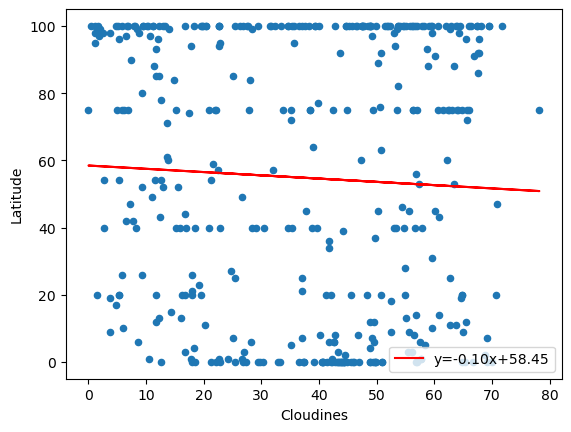

In [29]:
# Northern Hemisphere
x= north_df["Lat"]
y= north_df["Cloudiness"]
north_df.plot(kind="scatter", x="Lat", y="Cloudiness", 
                           ylabel="Latitude", xlabel="Cloudines")

res = stats.linregress(x, y)
print(f"The R-squared value is: {res.rvalue**2:.6f}")
m, b = np.polyfit(x, y, 1)
plt.plot(x, (m*x+b), color='red', label= "y={:.2f}x+{:.2f}".format(res.slope,res.intercept))
plt.legend(loc='lower right')

The R-squared value is: 0.007575


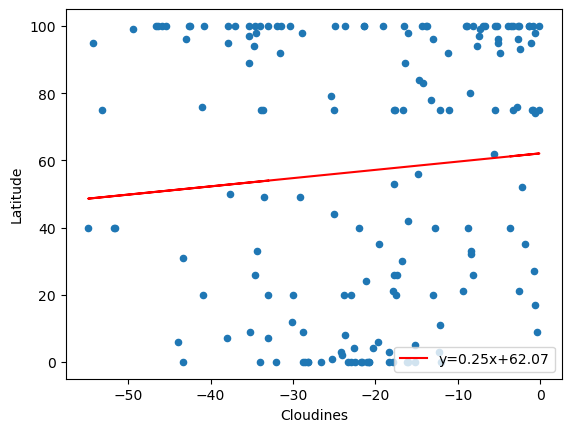

In [30]:
# Southern Hemisphere
x= south_df["Lat"]
y= south_df["Cloudiness"]
south_df.plot(kind="scatter", x="Lat", y="Cloudiness", 
                           ylabel="Latitude", xlabel="Cloudines")

res = stats.linregress(x, y)
print(f"The R-squared value is: {res.rvalue**2:.6f}")
m, b = np.polyfit(x, y, 1)
plt.plot(x, (m*x+b), color='red', label= "y={:.2f}x+{:.2f}".format(res.slope,res.intercept))
plt.legend(loc='lower right')

**Discussion about the linear relationship:** Based on the scatter plot and regression value there is not enough correlation between cloudiness and latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The R-squared value is: 0.002258


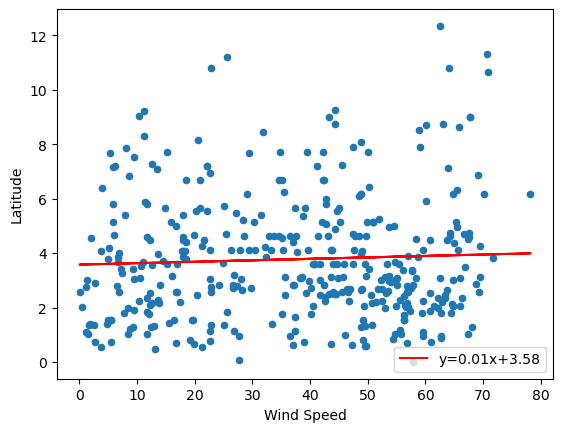

In [31]:
# Northern Hemisphere
x= north_df["Lat"]
y= north_df["Wind Speed"]
north_df.plot(kind="scatter", x="Lat", y="Wind Speed", 
                           ylabel="Latitude", xlabel="Wind Speed")

res = stats.linregress(x, y)
print(f"The R-squared value is: {res.rvalue**2:.6f}")
m, b = np.polyfit(x, y, 1)
plt.plot(x, (m*x+b), color='red', label= "y={:.2f}x+{:.2f}".format(res.slope,res.intercept))
plt.legend(loc='lower right')

The R-squared value is: 0.061736


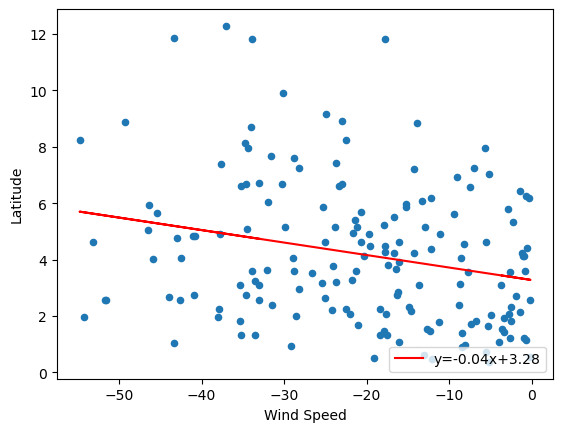

In [32]:
# Southern Hemisphere
x= south_df["Lat"]
y= south_df["Wind Speed"]
south_df.plot(kind="scatter", x="Lat", y="Wind Speed", 
                           ylabel="Latitude", xlabel="Wind Speed")

res = stats.linregress(x, y)
print(f"The R-squared value is: {res.rvalue**2:.6f}")
m, b = np.polyfit(x, y, 1)
plt.plot(x, (m*x+b), color='red', label= "y={:.2f}x+{:.2f}".format(res.slope,res.intercept))
plt.legend(loc='lower right')

**Discussion about the linear relationship:** Based on the scatter plot and regression value the wind speed has no correlation with latitude.